In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# EDA

In [20]:
# Cargo el dataset de películas
df_credits = pd.read_parquet('../data/procesado/credits_pilabs.parquet', engine='pyarrow')
df_movies = pd.read_parquet('../data/procesado/movies_pilabs.parquet', engine='pyarrow')

In [21]:
df_credits.columns

Index(['id', 'actor', 'department', 'job', 'director'], dtype='object')

In [22]:
df_movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'collection_name', 'genre_name',
       'production_company_name', 'production_country_name',
       'spoken_language_name', 'release_year', 'return'],
      dtype='object')

- Calculo y visualizo las relaciones más relevantes entre las variables categóricas del dataset df_movies utilizando el coeficiente de Cramer (Cramer's V)

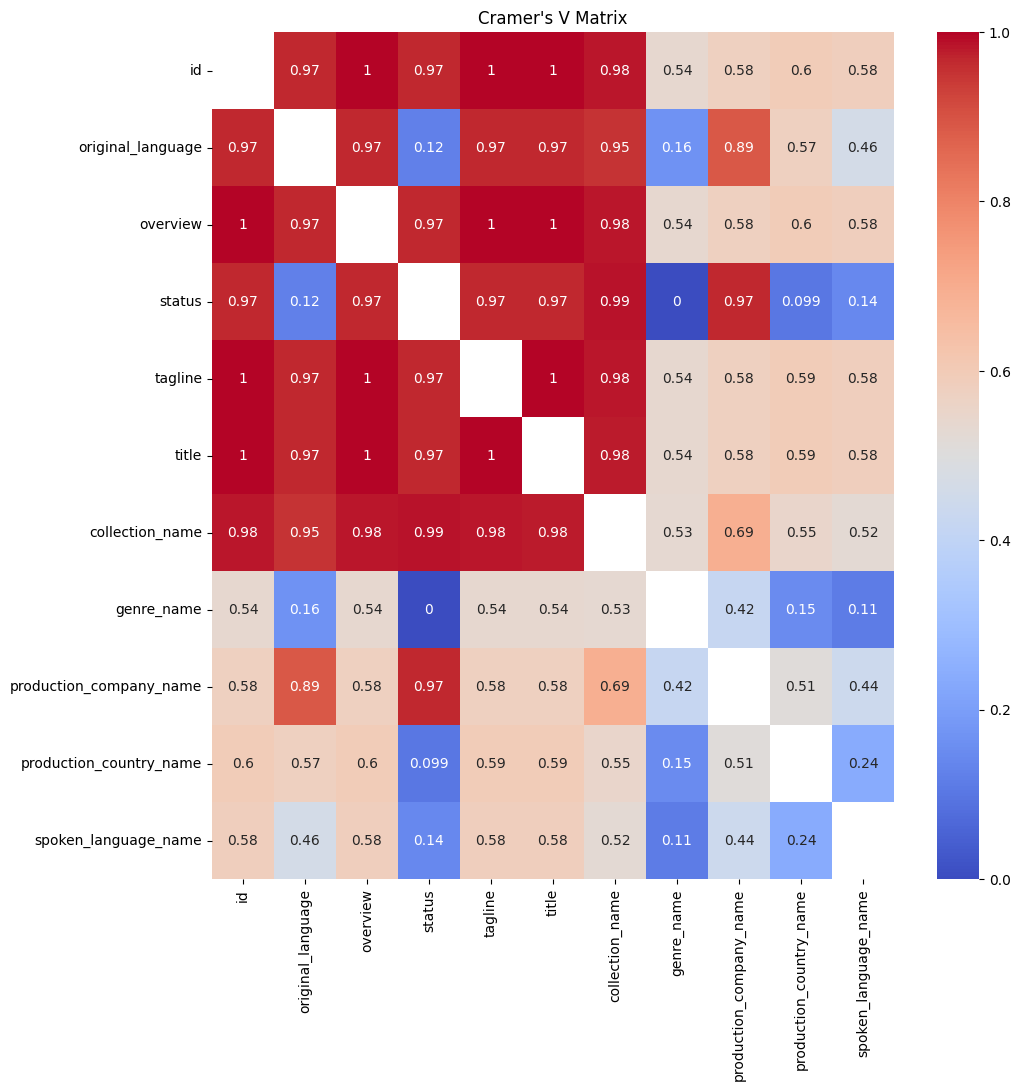

In [35]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# Calcular la matriz de Cramer's V
categorical_columns = df_movies.select_dtypes(include=['object', 'category']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = np.nan
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df_movies[col1], df_movies[col2])

# Visualizar la matriz de Cramer's V
plt.figure(figsize=(11, 11))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramer's V Matrix")
plt.show()

- Calculo y visualizo las relaciones más relevantes entre las variables categóricas del dataset df_credits utilizando el coeficiente de Cramer (Cramer's V)

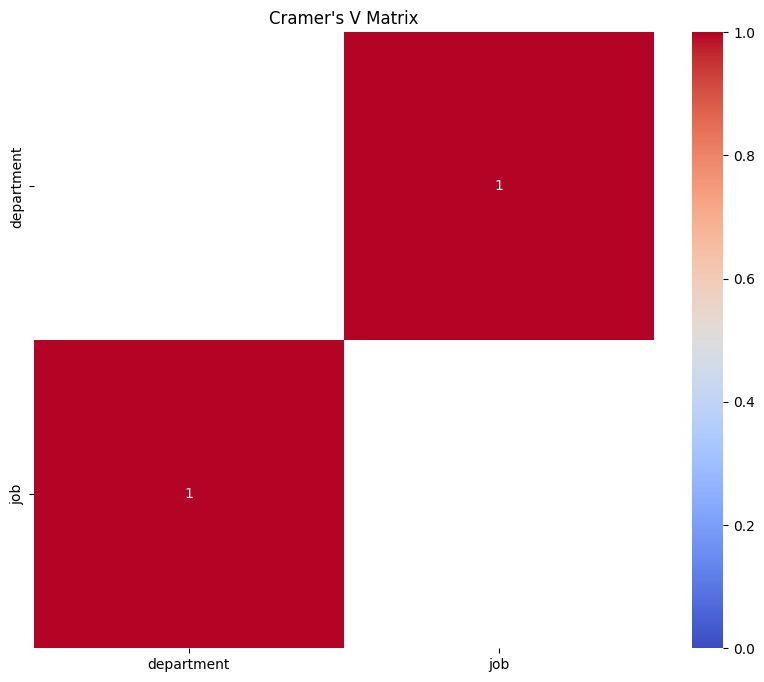

In [43]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Umbral para el número máximo de categorías únicas
max_unique_categories = 150000

# Seleccionar columnas categóricas que cumplan con el umbral
categorical_columns = [
    col for col in df_credits.columns
    if df_credits[col].dtype == 'object' and df_credits[col].nunique() <= max_unique_categories
]

# Calcular la matriz de Cramer's V
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = np.nan
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df_credits[col1], df_credits[col2])

# Visualizar la matriz de Cramer's V
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramer's V Matrix")
plt.show()